In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import pandas_datareader.data as web

from keras.callbacks import EarlyStopping

import keras
from keras.models import load_model

#from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

import warnings
warnings.filterwarnings('ignore')

Using Theano backend.


In [2]:
def stockplotter(ticker, plot=True):
    
    try:
        #stock = pdr.get_data_yahoo(ticker,start,end)
        data = {}
        for stock in ticker:
            data = web.DataReader(stock,'yahoo','2018','2021')['Adj Close']
        df_1 = pd.DataFrame(data)#.reset_index()
        if plot==True:
            df_1.plot(figsize=(12,8))
            plt.title("Stock Price Historical Data")
            #plt.set(title=f'Housing Prices by Year - {zip_df.index.freq}')
            plt.xlabel('Dates')
            plt.ylabel('Stock Prices')
            plt.legend(bbox_to_anchor=(1.05,1),loc='upper left') 
        
        return df_1
     
    except Exception as e:
        print("Error occured:", e)
        #data = 'Incorrect Symbol'


Symbols,AAPL,GOOGL,AMZN,MSFT,DAL
Date,,,,,
2018-01-02,41.442081,1073.209961,1189.010010,82.383636,53.520050
2018-01-03,41.434864,1091.520020,1204.199951,82.767044,52.529640
2018-01-04,41.627323,1095.760010,1209.589966,83.495522,52.529640
2018-01-05,42.101261,1110.290039,1229.140015,84.530701,52.793751
2018-01-08,41.944889,1114.209961,1246.869995,84.616966,51.576958
...,...,...,...,...,...
2020-12-24,131.970001,1734.160034,3172.689941,222.750000,39.730000
2020-12-28,136.690002,1773.959961,3283.959961,224.960007,40.150002
2020-12-29,134.869995,1757.760010,3322.000000,224.149994,40.029999


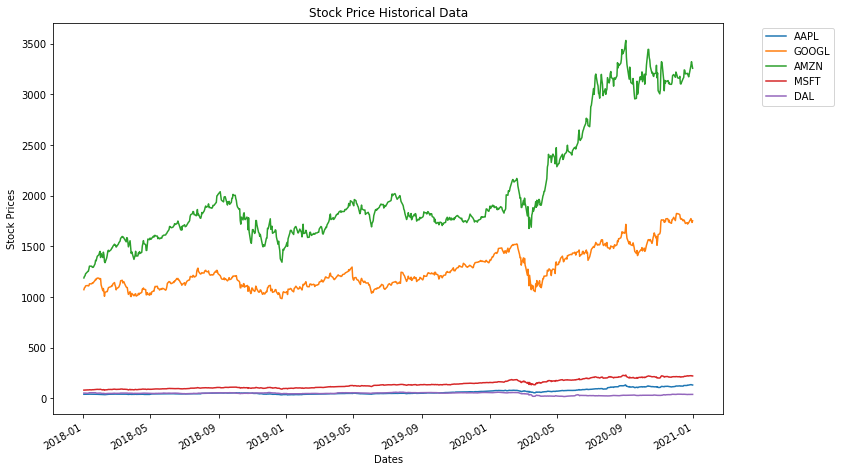

In [3]:
df_1 = stockplotter([['AAPL','GOOGL','AMZN','MSFT','DAL']], plot=True)
df_1

In [4]:
value='TSLA,AMZN'
value

'TSLA,AMZN'

In [5]:
symbols = value.split(',')
symbols

['TSLA', 'AMZN']

In [6]:
my_dict = {}
start= '2014-1-1'
end = '2018-1-12'
for sym in symbols:
    my_dict[sym] = web.get_data_yahoo(sym,start, end)['Adj Close']
    

In [7]:
my_dict.keys()



dict_keys(['TSLA', 'AMZN'])

In [8]:
my_dict1 = pd.concat(my_dict, axis=1)
my_dict1.index

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-14', '2014-01-15',
               ...
               '2017-12-29', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-08', '2018-01-09', '2018-01-10',
               '2018-01-11', '2018-01-12'],
              dtype='datetime64[ns]', name='Date', length=1016, freq=None)

In [9]:
my_dict1

,TSLA,AMZN
Date,,
2014-01-02,30.020000,397.970001
2014-01-03,29.912001,396.440002
2014-01-06,29.400000,393.630005
2014-01-07,29.872000,398.029999
2014-01-08,30.256001,401.920013
...,...,...
2018-01-08,67.281998,1246.869995
2018-01-09,66.737999,1252.699951
2018-01-10,66.959999,1254.329956


In [10]:
"""
dcc.Input(
    id="ticker-search",
    type="search",
    debounce=True,
    placeholder="search for stock",
    bs_size="lg",
    className="mb-3"
  )

"""
from datetime import datetime as dt, date

import dash

from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import pandas_datareader.data as web
from datetime import datetime

app = JupyterDash(__name__)

app.layout = html.Div([
                        html.H1('Stock Dashboard'),
                        html.Div([html.H3('Enter a Stock Symbol:', style={'paddingRight':'30px'}),

                        dcc.Input(
                            id='my_ticker_symbol',
                            value='TSLA,AMZN',  #multi strings to get more than 1
                            style={'fontSize':24, 'width':75}
                        )], style={'display': 'inline-block','verticalAlign':'top'}), 

                        html.Div([html.H3('Select a start and end date'),
                                dcc.DatePickerRange(id='my_date_picker',
                                        min_date_allowed=datetime(2015,1,1),
                                        max_date_allowed=datetime.today(),
                                        start_date= datetime(2018,1,1),
                                        end_date = datetime.today()
#                                           display_format='MMM Do, YY',
#                                           # updatemode='bothdates',
#                                           initial_visible_month=date.today(),
#                                           end_date=date.today()          
                                                                    )
                        ], style={'display':'inline-block'}),

                        html.Div([
                                    html.Button(id='submit-button',
                                                n_clicks =0,
                                                children='Submit',
                                                style={'fontSize':24, 'marginLeft':'30px'}

                            )
                        ], style={'display':'inline-block'}),    

                        dcc.Graph(id='my_graph',
                                    figure={'data':[
                                                {'x':[1,2], 'y':[3,1]}  #{'x':[1,2], 'y':[3,1]}

                                    ], 'layout': {"title":'Default Title'}}

                        )

            ])
#title is updated based on what inputedt   
@app.callback(
Output('my_graph','figure'),
[Input('submit-button','n_clicks')],
[State('my_ticker_symbol','value'),
            State('my_date_picker', 'start_date'),
            State('my_date_picker', 'end_date')

        ])


#function that has decorator
def update_graph(n_clicks, stock, start_date,end_date): #for any vsible nme we decide on
        start = datetime.strptime(start_date[:10],'%Y-%m-%d')
        end= datetime.strptime(end_date[:10],'%Y-%m-%d')
            #split stock_ticker
        my_dict={}
        
        symbols = stock.split(',')  #value='TSLA,AMZN',
            #for loop 
        for sym in symbols:
            my_dict[sym] = web.DataReader(sym,'yahoo','2018','2021')
            my_dict1 = pd.concat(my_dict, axis=1) 
            #df = web.get_data_yahoo(stock_ticker,start, end) #value
            fig = {'data': [{'x': my_dict1.index, 'y':my_dict1[sym]['Adj Close']}],  #update the figure,
                    'layout':{'title': sym}   #title is equal to whatever stock_picker happens to be
            }
        return fig

def run_server(self,
                       port=8050,
                       debug=True,
                       threaded=True,
                       **flask_run_options):
            self.server.run(port=port, debug=debug, **flask_run_options)


app.run_server(mode='inline',debug=True, port=8051)
        #app.run_server(mode="jupyterlab", host="127.0.0.1", port=8889)       

## **Forecasting**

In [ ]:
def get_data(symbol, data_source,start,end):
    df = web.DataReader(symbol,data_source, start, end) 
    print(df.shape)
    
    plt.figure(figsize=(12,8))
    plt.plot(df['Close'])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    return df

In [ ]:
the_data = get_data('TGT',data_source='yahoo', start='2016-01-01',end='2021-1-11')
the_data

In [ ]:
#df = pd.read_csv('data/apple_2012_1_1-2019_12_17.csv', parse_dates=True, index_col=[0])

#Get the stock quote 
#df = web.DataReader('TGT', data_source='yahoo', start='2016-01-01', end='2021-1-11') 

In [ ]:
#df = df.diff().dropna() #zip_df[11226].diff().dropna()

In [ ]:
def preprocessing(df,percentage):
    training_data_len = int(np.round(len(df) * percentage))
    dataset = pd.DataFrame(df)
    scaler = MinMaxScaler(feature_range = (0, 1))
    scaled_data = scaler.fit_transform(dataset)
    return training_data_len, dataset, scaler, scaled_data

In [ ]:
#training_data_len, dataset, scaler, scaled_data = preprocessing(df['Close'], percentage=.8)
training_data_len, dataset, scaler, scaled_data = preprocessing(the_data['Adj Close'], percentage=.8)

In [ ]:
def create_sets(training_data_len):
    #create training data set
    train_data = scaled_data[0:training_data_len,:]
    test_data = scaled_data[training_data_len -60:,:] #to 2003 which is end of dataset
    #split data into X_train and y_train data sets
    X_train = []
    y_train = []
    #create dataset X_test and y_test data sets
    X_test = []
    y_test = []    #dataset.iloc[training_data_len:, :]


    for i in range(60, len(train_data)):
        X_train.append(train_data[i-60:i])
        y_train.append(train_data[i,0]) #will contain 61st value which will be at position 60

    for i in range(60, len(test_data)):
        X_test.append(test_data[i-60:i,0]) 
        y_test.append(test_data[i,0])
        
    X_train, y_train = np.array(X_train), np.array(y_train)  
    X_test = np.array(X_test) #added
    X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1)) #added
    y_test = np.array(y_test)
        
    return X_train, X_test, y_train, y_test    

In [ ]:
X_train, X_test, y_train, y_test = create_sets(training_data_len)

In [ ]:
#early_stop = EarlyStopping(monitor='val_loss', patience=2)

def create_model(X_train, y_train):
    model = Sequential()

    model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1],1)))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50, return_sequences = False))
    model.add(Dropout(0.2))

    model.add(Dense(units = 25))
    model.add(Dense(units = 1))

    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

    model.summary()
    
    return model


In [ ]:

model = create_model(X_train,y_train)

In [ ]:
#callbacks=[early_stop]
early_stop = EarlyStopping(monitor='val_loss', patience=2)
model.fit(X_train,y_train, epochs=10,batch_size=32,callbacks=[early_stop])     

In [ ]:
def save_model():
    model.save('model_parameters')
    model_params = keras.models.load_model('model_parameters')
    model_params.summary()

    return model_params

In [ ]:
model_params = save_model()

In [ ]:
def make_prediction(model, X_test, y_test,training_data_len):
    predictions = model.predict(X_test)
    prediction_unscaled = scaler.inverse_transform(predictions) #unscaling the values
    
    y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1,1)) #unscaling the values
    
    #this is in dollars
    rmse_predictions = np.sqrt(np.mean(prediction_unscaled -y_test_unscaled)**2)
    rmse_predictions
    
    predictions = pd.DataFrame(prediction_unscaled, columns=['Predictions'])
    
    train = dataset[:training_data_len]
    valid = dataset[training_data_len:] #data from index training_data_len to 
    
    valid.reset_index(inplace=True)
    valid['Prediction'] = predictions['Predictions']
    valid1 = valid.set_index('Date')
    
    plt.figure(figsize=(12,8))
    plt.title('Model')
    plt.xlabel('Label')
    plt.ylabel('Close Price USD ($)')
    plt.plot(train['Adj Close'])
    #plt.plot(valid[['Close','Predictions']])
    plt.plot(valid1['Adj Close'])
    plt.plot(valid1['Prediction'])
    # #valid[['Close','Predictions']].plot()
    plt.legend(['Train','Valid','Predictions'],loc='lower right')
    return rmse_predictions, valid1
    

In [ ]:
make_prediction(model, X_test,y_test, training_data_len )

In [ ]:
from sklearn import metrics

In [ ]:
"""
blue-data model was trainined on 
orange-actual closing stock price for rest of days
green-what model predcited values to be

predict closing price fo TGT stock for 2021-1-11  199.10

get the quote
"""
def get_quote(new_df):
    #get last 60days closing values and convert datframe to an array
    last_60_days = new_df[-60:].values #converts to array
    #scale data
    last_60_days_scaled = scaler.transform(last_60_days)
    #create empty list
    x_test = []
    #append last 60 days to x_test
    x_test.append(last_60_days_scaled)
    #conert x_test to a numpy array
    x_test = np.array(x_test)
    # #reshape the data
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
    #get the predicted scaled price
    pred_price = model.predict(x_test)
    #undo the scaling 
    pred_price = scaler.inverse_transform(pred_price) 
    #what model thinks predicted price will be for 12/18/2019
    #the actual prcie was $69.94
    #DAL: 58.58, 2021-1-11 40.19
    return pred_price                    

In [ ]:
get_quote(dataset)

## New Model

In [ ]:
the_data = get_data('AMZN',data_source='yahoo', start='2016-01-01',end='2021-1-11')
the_data

In [ ]:
training_data_len, dataset, scaler, scaled_data = preprocessing(the_data['Adj Close'], percentage=.8)

In [ ]:
X_train, X_test, y_train, y_test = create_sets(training_data_len)

In [ ]:
model_params.summary()

In [ ]:
#model.fit(X_train,y_train, epochs=50,batch_size=32,callbacks=[early_stop])  

In [ ]:
make_prediction(model_params, X_test,y_test, training_data_len )

In [ ]:
get_quote(dataset)